In [2]:
from multiprocessing.dummy import Pool as ThredPool
pool=ThredPool()
pool.map(print,[1,2,3,4])
pool.close()
pool.join()

TypeError: '<=' not supported between instances of 'list' and 'int'

In [121]:
import matplotlib.animation as anime
import matplotlib.pyplot as plt
import numpy as np
# import pandas as pd
import random

# def func(x):
# 	A=4-8*random.random()
# 	B=4-8*random.random()
# 	C=5-8*random.random()
# 	return A*np.sin(B*x+C)

# def rand_func():
# 	xlist=[]
# 	ylist=[]
# 	for xval in np.linspace(-10, 10, 100):
# 		xlist.append(xval)
# 		temp_y=0
# 		for _ in range(0,8):
# 			temp_y+=func(xval)
# 		ylist.append(temp_y)
# 	return xlist, ylist

In [122]:
def xlist_create(duration):
	return list(range(0,duration,1))
def ylist_create(index,avg,var,spike,spike_h,duration):
	baseline=np.ones(duration)*avg
	variation=np.random.random(duration)*var
	if (spike == 1):
		variation[np.random.randint(duration)]+=spike_h*var
	return baseline+variation

In [123]:
DURATION=100
LINE_NUM=3
AVG=[-5,0,5]
VAR=[6,3,5]
SPIKE=[0,1,0]
SPIKE_H=5
CBF_PALLETE=['#000000','#F35555','#56B0FF','#E6E335']

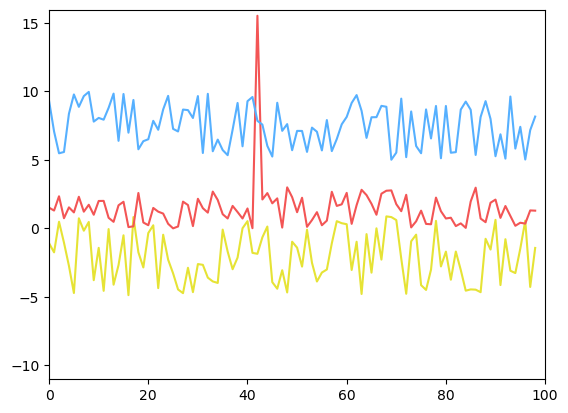

In [124]:
fig = plt.figure()
xlist=[] #Length of the line
ylist=[] #function that INPUT: AVG,VAR,SPIKE,OUTPUT: A series of num
linelist=[]
pallete=random.sample(CBF_PALLETE,k=LINE_NUM)
for i in range(LINE_NUM):
	l, = plt.plot([], [], color=pallete[i])
	xlist.append(xlist_create(DURATION))
	ylist.append(ylist_create(i,AVG[i],VAR[i],SPIKE[i],SPIKE_H,DURATION))
	plt.xlim(0,DURATION) #depend on Duration
	plt.ylim(-min(ylist[-1])-max(VAR), max(ylist[-1])+max(VAR))
	linelist.append(l)
 
writer = anime.PillowWriter(fps=50)

with writer.saving(fig, "trace.gif", 100):
	for i in range(LINE_NUM):
		for j in range(DURATION):
			linelist[i].set_data(xlist[i][:j], ylist[i][:j])
			writer.grab_frame()